In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import random as rd
from statistics import mean
% matplotlib inline 

UsageError: Line magic function `%` not found.


In [110]:
#Data set for Vayyar sensor of person sitting down, idea to populate more would be to perhaps find a range for X,Y,Z axis and just randomize loactations multiple times to "simulate" a person sitting down
test1 = pd.read_csv(r"C:\Users\migelwlf\Documents\Vayyar\Sensor Recordings\Sitting_Test_1_Front\ApplicationLogs\Tracker_Jun_17_2022__16_33_18.csv")
test2 = pd.read_csv(r"C:\Users\migelwlf\Documents\Vayyar\Sensor Recordings\Sitting_Test_2_Front\ApplicationLogs\Tracker_Jun_21_2022__10_38_41.csv")
test3 = pd.read_csv(r"C:\Users\migelwlf\Documents\Vayyar\Sensor Recordings\Sitting_Test_3_Front\ApplicationLogs\Tracker_Jun_21_2022__10_48_16.csv")
test4 = pd.read_csv(r"C:\Users\migelwlf\Documents\Vayyar\Sensor Recordings\Sitting_Test_4_Front\ApplicationLogs\Tracker_Jun_21_2022__10_53_31.csv")
test5 = pd.read_csv(r"C:\Users\migelwlf\Documents\Vayyar\Sensor Recordings\Sitting_Test_5_Front\ApplicationLogs\Tracker_Jun_21_2022__11_02_04.csv")
test6 = pd.read_csv(r"C:\Users\migelwlf\Documents\Vayyar\Sensor Recordings\Sitting_Test_6\ApplicationLogs\Tracker_Jun_21_2022__15_02_59.csv")
tests1 = pd.read_csv(r"C:\Users\migelwlf\Documents\Vayyar\Sensor Recordings\Sitting_Test_Santi_1\ApplicationLogs\Tracker_Jun_21_2022__13_44_05.csv")
tests2 = pd.read_csv(r"C:\Users\migelwlf\Documents\Vayyar\Sensor Recordings\Sitting_Test_Santi_2\ApplicationLogs\Tracker_Jun_21_2022__13_45_17.csv")

stand_test_1 = pd.read_csv(r"C:\Users\migelwlf\Documents\Vayyar\Sensor Recordings\Standing_Test_1\ApplicationLogs\Tracker_Jun_21_2022__15_08_16.csv")

test1.drop(test1.columns[10:42], axis=1, inplace=True) #removing all columns excluding 1st 6

In [120]:
x_ax=test1['TARGET_X'].values
y_ax=test1['TARGET_Y'].values

x_ax2=test2['TARGET_X'].values
y_ax2=test2['TARGET_Y'].values

z_ax=test1['TARGET_Z'].values

z_ax2=test2['TARGET_Z'].values

z_ax3=test3['TARGET_Z'].values
z_ax4=test4['TARGET_Z'].values
z_ax5=test5['TARGET_Z'].values
z_ax6=test6['TARGET_Z'].values


z_axs1=tests1['TARGET_Z'].values
z_axs2=tests2['TARGET_Z'].values

z_ax_stand1 = stand_test_1['TARGET_Z'].values
print(min(z_ax_stand1))
print(max(z_ax_stand1))

1.13
1.93


In [107]:
minimum = [min(z_ax),min(z_ax2),min(z_ax3),min(z_ax4),min(z_ax5)]
maximum = [max(z_ax),max(z_ax2),max(z_ax3),max(z_ax4),max(z_ax5)]

print(np.std(minimum))
print(mean(minimum))
print(np.std(maximum))
print(mean(maximum))
sit_range = [(abs(np.std(minimum) - mean(minimum))),(abs(np.std(maximum)+mean(maximum)))]
sit_range

0.22342784070030305
0.73
0.10707007051459336
1.716


[0.5065721592996969, 1.8230700705145932]

In [117]:
avg_range = mean(z_ax_stand1)
print(avg_range)
if avg_range >= sit_range[0] or avg_range <= sit_range[1]:
    print("sitting")
else:
    print("not sitting")

1.5038147138964577
sitting


In [49]:
x_ax1 = []
y_ax1 = []
z_ax1 = []

for row in range (test1['TARGET_ID.1'].size):
    if test1['TARGET_ID.1'].values[row] >=0:
       x_ax1.append(test1['TARGET_X.1'].values[row])
       y_ax1.append(test1['TARGET_Y.1'].values[row])
       z_ax1.append(test1['TARGET_Z.1'].values[row])
    else:
        pass


In [50]:
type(test1['TIME_STAMP'][0])
test1['TIME_STAMP'] = pd.to_datetime(test1['TIME_STAMP'])

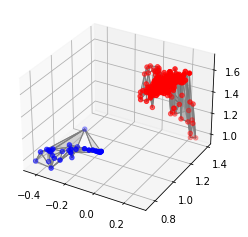

In [51]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(x_ax1,y_ax1,z_ax1, color='white', edgecolors='grey', alpha=.5)
ax.plot_trisurf(x_ax,y_ax,z_ax, color='white', edgecolors='grey', alpha=.5)
ax.scatter(x_ax,y_ax,z_ax, c='red')
ax.scatter(x_ax1,y_ax1,z_ax1, c='blue')

plt.show()

In [52]:
psudo_x = []
psudo_y = []
psudo_z = []

for row in range(test1['TARGET_ID'].size):
    psudo_x.append(rd.uniform(min(x_ax), max(x_ax)))
    psudo_y.append(rd.uniform(min(y_ax), max(y_ax)))
    psudo_z.append(rd.uniform(min(z_ax), max(z_ax)))

print(min(z_ax))
print(max(z_ax))

0.98
1.69


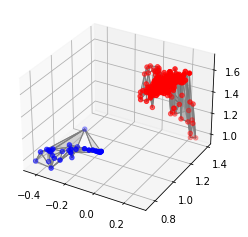

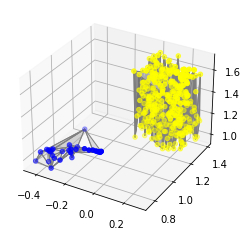

In [53]:
fig = plt.figure()
fig1 = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax1 = fig1.add_subplot(111, projection='3d')
ax.plot_trisurf(x_ax,y_ax,z_ax, color='white', edgecolors='grey', alpha=.5)
ax.plot_trisurf(x_ax1,y_ax1,z_ax1, color='white', edgecolors='grey', alpha=.5)
ax1.plot_trisurf(psudo_x,psudo_y,psudo_z, color='white', edgecolors='grey', alpha=.5)
ax1.plot_trisurf(x_ax1,y_ax1,z_ax1, color='white', edgecolors='grey', alpha=.5)
ax.scatter(x_ax,y_ax,z_ax, c='red')
ax.scatter(x_ax1,y_ax1,z_ax1, c='blue')
ax1.scatter(psudo_x,psudo_y,psudo_z, c='yellow')
ax1.scatter(x_ax1,y_ax1,z_ax1, c='blue')